# Definition of the Relational Model: Transformation from Entity Diagram

The relational model defines how data is organized and manipulated in a relational database management system (RDBMS). It represents data as tables (or relations) consisting of rows and columns. The transformation from an Entity-Relationship Diagram (ERD) to a relational model involves converting entities and their attributes into tables and columns, respectively. Each entity in the ERD becomes a table in the relational model, and each attribute of the entity corresponds to a column in the table. This transformation simplifies data representation and enables efficient storage and retrieval.



In [ ]:
class Entity:
    def __init__(self, name, attributes):
        self.name = name
        self.attributes = attributes

class Attribute:
    def __init__(self, name, data_type):
        self.name = name
        self.data_type = data_type

def transform_to_relational_model(entities):
    relational_model = {}
    for entity in entities:
        table_name = entity.name
        attributes = entity.attributes
        relational_model[table_name] = attributes
    return relational_model

# Define entities and their attributes
entities = [
    Entity("Student", [Attribute("ID", "INTEGER"), Attribute("Name", "TEXT"), Attribute("Age", "INTEGER")]),
    Entity("Course", [Attribute("ID", "INTEGER"), Attribute("Title", "TEXT"), Attribute("Credits", "INTEGER")]),
    # Additional entities can be added here
]

# Transform ERD to relational model
relational_model = transform_to_relational_model(entities)
print("Relational Model:")
for table_name, attributes in relational_model.items():
    print(f"Table: {table_name}")
    for attribute in attributes:
        print(f"- {attribute.name}: {attribute.data_type}")

Relational Model:
Table: Student
- ID: INTEGER
- Name: TEXT
- Age: INTEGER
Table: Course
- ID: INTEGER
- Title: TEXT
- Credits: INTEGER


# Relationship to the Relational Model

This part involves establishing the relationship between the conceptual relational model obtained from the ERD and the physical implementation in a database management system. SQLite, a lightweight SQL database engine, is chosen for its simplicity and compatibility with Google Colab environments. The process begins by creating tables based on the relational model using SQL commands. Each table corresponds to an entity in the relational model, with columns representing attributes. Once the tables are created, relationships between them can be established through primary and foreign key constraints, enabling the modeling of complex database structures. Finally, the database is ready for data insertion, querying, and manipulation, providing a practical implementation of the conceptual relational model.






In [ ]:
import sqlite3

class Attribute:
    def __init__(self, name, data_type):
        self.name = name
        self.data_type = data_type

class Entity:
    def __init__(self, name, attributes):
        self.name = name
        self.attributes = attributes

def create_tables(cursor, relational_model):
    for table_name, attributes in relational_model.items():
        columns = ', '.join([f'{attr.name} {attr.data_type}' for attr in attributes])
        cursor.execute(f'CREATE TABLE {table_name} ({columns})')

def establish_relationships(cursor, relationships):
    for relationship in relationships:
        cursor.execute(relationship)

def populate_data(cursor):
    # Sample data insertion
    cursor.execute("INSERT INTO Student (ID, Name, Age) VALUES (1, 'John Doe', 20)")
    cursor.execute("INSERT INTO Student (ID, Name, Age) VALUES (2, 'Jane Smith', 22)")
    cursor.execute("INSERT INTO Course (ID, Title, Credits) VALUES (101, 'Introduction to Computer Science', 3)")
    cursor.execute("INSERT INTO Course (ID, Title, Credits) VALUES (102, 'Data Structures', 4)")

def main():
    # Define the relational model obtained from ERD transformation
    relational_model = {
        'Student': [Attribute('ID', 'INTEGER'), Attribute('Name', 'TEXT'), Attribute('Age', 'INTEGER')],
        'Course': [Attribute('ID', 'INTEGER'), Attribute('Title', 'TEXT'), Attribute('Credits', 'INTEGER')],
        'Enrollment': [Attribute('student_id', 'INTEGER'), Attribute('course_id', 'INTEGER')],
        'Professor': [Attribute('ID', 'INTEGER'), Attribute('Name', 'TEXT'), Attribute('Department', 'TEXT')],
        # Additional tables and their attributes can be added here
    }

    # Define relationships between tables
    relationships = [
        'CREATE TABLE IF NOT EXISTS Enrollment (student_id INTEGER, course_id INTEGER, FOREIGN KEY(student_id) REFERENCES Student(ID), FOREIGN KEY(course_id) REFERENCES Course(ID))',
        # Additional relationships can be added here
    ]

    # Connect to in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    # Create tables based on the relational model
    create_tables(cursor, relational_model)

    # Establish relationships between tables
    establish_relationships(cursor, relationships)

    # Populate sample data
    populate_data(cursor)

    # Commit changes
    conn.commit()

    # Print data from tables (optional)
    print("Sample Data from Tables:")
    cursor.execute("SELECT * FROM Student")
    print("Student Table:")
    print(cursor.fetchall())
    cursor.execute("SELECT * FROM Course")
    print("Course Table:")
    print(cursor.fetchall())
    cursor.execute("SELECT * FROM Enrollment")
    print("Enrollment Table:")
    print(cursor.fetchall())

    # Close connection
    conn.close()

if __name__ == '__main__':
    main()

Sample Data from Tables:
Student Table:
[(1, 'John Doe', 20), (2, 'Jane Smith', 22)]
Course Table:
[(101, 'Introduction to Computer Science', 3), (102, 'Data Structures', 4)]
Enrollment Table:
[]


#Relational Algebra

#Classic Relational Algebra

Classic relational algebra provides a theoretical foundation for relational databases. In the Python implementation, we utilize SQLite commands to create example tables (Students and Courses). We then perform classic relational algebra operations using SQL SELECT statements with WHERE clauses for selection and specifying column names for projection.



In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT,
                    Credits INTEGER
                )''')

# Populate example tables
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")

cursor.execute("INSERT INTO Courses VALUES (101, 'Introduction to Computer Science', 3)")
cursor.execute("INSERT INTO Courses VALUES (102, 'Data Structures', 4)")

# Classic relational algebra operations using SQLite commands
cursor.execute('''SELECT Name, Age FROM Students WHERE Age > 21''')
selected_students = cursor.fetchall()
print("Selected Students:", selected_students)

cursor.execute('''SELECT ID, Title FROM Courses''')
projected_courses = cursor.fetchall()
print("Projected Courses:", projected_courses)

# Close connection
conn.close()

Selected Students: [('Jane Smith', 22)]
Projected Courses: [(101, 'Introduction to Computer Science'), (102, 'Data Structures')]


#Selections and Projections

Selection and projection are fundamental operations in relational algebra. In the Python implementation, we use SQLite commands to perform these operations. We select rows based on a specified condition using a WHERE clause for selection and specify column names for projection in the SELECT statement.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 19)")

# Selection and Projection using SQLite commands
cursor.execute('''SELECT * FROM Students WHERE Age > 21''')
selected_students = cursor.fetchall()
print("Selected Students (Age > 21):", selected_students)

cursor.execute('''SELECT ID, Name FROM Students''')
projected_students = cursor.fetchall()
print("Projected Students (ID and Name):", projected_students)

# Close connection
conn.close()

Selected Students (Age > 21): [(2, 'Jane Smith', 22)]
Projected Students (ID and Name): [(1, 'John Doe'), (2, 'Jane Smith'), (3, 'Alice Johnson')]


#Main Unary Operators

Unary operators in relational algebra operate on a single relation. In the Python implementation, we use SQLite commands to demonstrate unary operators. We rename a table using the ALTER TABLE statement and create a new table that is the union of an existing table with itself using the UNION operator.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 19)")

# Unary operators using SQLite commands
cursor.execute('''ALTER TABLE Students RENAME TO NewStudents''')

cursor.execute('''CREATE TABLE StudentsCopy AS
                    SELECT * FROM NewStudents UNION SELECT * FROM NewStudents''')

# Close connection
conn.close()

#Aggregation Functions

Aggregation functions in relational algebra compute summary statistics over groups of tuples in a relation. In the Python implementation, we use SQLite commands to calculate the sum and average of grades from an example table Grades. We use the SUM and AVG aggregate functions in SQL to perform these calculations.


In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Grades (
                    StudentID INTEGER PRIMARY KEY,
                    Grade INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Grades VALUES (1, 85)")
cursor.execute("INSERT INTO Grades VALUES (2, 90)")
cursor.execute("INSERT INTO Grades VALUES (3, 75)")
cursor.execute("INSERT INTO Grades VALUES (4, 95)")

# Aggregation functions using SQLite commands
cursor.execute('''SELECT SUM(Grade) FROM Grades''')
total_grade_sum = cursor.fetchone()[0]
print("Total Grade Sum:", total_grade_sum)

cursor.execute('''SELECT AVG(Grade) FROM Grades''')
average_grade = cursor.fetchone()[0]
print("Average Grade:", average_grade)

# Close connection
conn.close()

Total Grade Sum: 345
Average Grade: 86.25


#More Complex Relational Algebra Operations

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT,
                    Credits INTEGER
                )''')

cursor.execute('''CREATE TABLE Enrollment (
                    StudentID INTEGER,
                    CourseID INTEGER,
                    Grade INTEGER,
                    FOREIGN KEY(StudentID) REFERENCES Students(ID),
                    FOREIGN KEY(CourseID) REFERENCES Courses(ID)
                )''')

# Populate example tables
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 21)")
cursor.execute("INSERT INTO Courses VALUES (101, 'Introduction to Computer Science', 3)")
cursor.execute("INSERT INTO Courses VALUES (102, 'Data Structures', 4)")
cursor.execute("INSERT INTO Courses VALUES (103, 'Database Systems', 3)")
cursor.execute("INSERT INTO Enrollment VALUES (1, 101, 85)")
cursor.execute("INSERT INTO Enrollment VALUES (2, 102, 90)")
cursor.execute("INSERT INTO Enrollment VALUES (3, 101, 80)")
cursor.execute("INSERT INTO Enrollment VALUES (1, 103, 75)")
cursor.execute("INSERT INTO Enrollment VALUES (2, 101, 95)")

# Complex relational algebra operations using SQLite commands
# Aggregate functions, subqueries, GROUP BY, ORDER BY
cursor.execute('''SELECT Students.Name, AVG(Enrollment.Grade) AS AvgGrade
                  FROM Students
                  INNER JOIN Enrollment ON Students.ID = Enrollment.StudentID
                  GROUP BY Students.Name
                  ORDER BY AvgGrade DESC''')
average_grades = cursor.fetchall()
print("Average Grades by Student (Ordered by Average Grade):", average_grades)

# Close connection
conn.close()

Average Grades by Student (Ordered by Average Grade): [('Jane Smith', 92.5), ('John Doe', 80.0), ('Alice Johnson', 80.0)]


In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT,
                    Credits INTEGER
                )''')

cursor.execute('''CREATE TABLE Enrollment (
                    StudentID INTEGER,
                    CourseID INTEGER,
                    Grade INTEGER,
                    FOREIGN KEY(StudentID) REFERENCES Students(ID),
                    FOREIGN KEY(CourseID) REFERENCES Courses(ID)
                )''')

# Populate example tables
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 21)")
cursor.execute("INSERT INTO Courses VALUES (101, 'Introduction to Computer Science', 3)")
cursor.execute("INSERT INTO Courses VALUES (102, 'Data Structures', 4)")
cursor.execute("INSERT INTO Courses VALUES (103, 'Database Systems', 3)")
cursor.execute("INSERT INTO Enrollment VALUES (1, 101, 85)")
cursor.execute("INSERT INTO Enrollment VALUES (2, 102, 90)")
cursor.execute("INSERT INTO Enrollment VALUES (3, 101, 80)")
cursor.execute("INSERT INTO Enrollment VALUES (1, 103, 75)")
cursor.execute("INSERT INTO Enrollment VALUES (2, 101, 95)")

# Complex relational algebra operations using SQLite commands
# Aggregate functions, JOINS, GROUP BY
cursor.execute('''SELECT Students.Name, AVG(Enrollment.Grade) AS AvgGrade
                  FROM Students
                  INNER JOIN Enrollment ON Students.ID = Enrollment.StudentID
                  GROUP BY Students.Name''')
average_grades = cursor.fetchall()
print("Average Grades by Student:", average_grades)

# Close connection
conn.close()

Average Grades by Student: [('Alice Johnson', 80.0), ('Jane Smith', 92.5), ('John Doe', 80.0)]


#Relational Tuple Calculus (RTC)

Relational Tuple Calculus is a non-procedural query language where queries are expressed as formulas describing the desired result set without specifying the sequence of operations to obtain it.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT,
                    Credits INTEGER
                )''')

cursor.execute('''CREATE TABLE Enrollment (
                    StudentID INTEGER,
                    CourseID INTEGER,
                    FOREIGN KEY(StudentID) REFERENCES Students(ID),
                    FOREIGN KEY(CourseID) REFERENCES Courses(ID)
                )''')

# Populate example tables
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 19)")

cursor.execute("INSERT INTO Courses VALUES (101, 'Introduction to Computer Science', 3)")
cursor.execute("INSERT INTO Courses VALUES (102, 'Data Structures', 4)")

cursor.execute("INSERT INTO Enrollment VALUES (1, 101)")
cursor.execute("INSERT INTO Enrollment VALUES (2, 102)")

# Relational Tuple Calculus with INNER JOINS using SQLite commands with comparisons and string queries
cursor.execute('''SELECT Students.Name, Courses.Title
                  FROM Students
                  INNER JOIN Enrollment ON Students.ID = Enrollment.StudentID
                  INNER JOIN Courses ON Enrollment.CourseID = Courses.ID
                  WHERE Students.Age > 20 AND Courses.Title LIKE '%Data%' ''')
result = cursor.fetchall()
print("Result of Relational Tuple Calculus with INNER JOINS and Comparisons/String queries:")
for row in result:
    print(row)

# Close connection
conn.close()

Result of Relational Tuple Calculus with INNER JOINS and Comparisons/String queries:
('Jane Smith', 'Data Structures')


#Query Languages

#Structured Query Language (SQL)

Structured Query Language (SQL) is a standard language for managing and manipulating relational databases.



In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 21)")

# Select all records from the table
cursor.execute('''SELECT * FROM Students''')
result = cursor.fetchall()
print("All records from Students table:")
for row in result:
    print(row)

# Close connection
conn.close()

All records from Students table:
(1, 'John Doe', 20)
(2, 'Jane Smith', 22)
(3, 'Alice Johnson', 21)


# Selections and Projections

Selections and projections are fundamental operations in SQL for filtering and selecting specific data from tables.



In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")
cursor.execute("INSERT INTO Students VALUES (3, 'Alice Johnson', 21)")

# SQL Selection and Projection
cursor.execute('''SELECT Name FROM Students WHERE Age > 20''')
selected_students = cursor.fetchall()
print("Selected Students (Age > 20):", selected_students)

cursor.execute('''SELECT ID, Name FROM Students''')
projected_students = cursor.fetchall()
print("Projected Students (ID and Name):", projected_students)

# Close connection
conn.close()

Selected Students (Age > 20): [('Jane Smith',), ('Alice Johnson',)]
Projected Students (ID and Name): [(1, 'John Doe'), (2, 'Jane Smith'), (3, 'Alice Johnson')]


#Aggregations and Groupings

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Grades (
                    StudentID INTEGER PRIMARY KEY,
                    Grade INTEGER
                )''')

# Populate example table
cursor.execute("INSERT INTO Grades VALUES (1, 85)")
cursor.execute("INSERT INTO Grades VALUES (2, 90)")
cursor.execute("INSERT INTO Grades VALUES (3, 75)")
cursor.execute("INSERT INTO Grades VALUES (4, 95)")

# SQL Aggregations and Groupings
cursor.execute('''SELECT AVG(Grade) FROM Grades''')
average_grade = cursor.fetchone()[0]
print("Average Grade:", average_grade)

cursor.execute('''SELECT MIN(Grade) FROM Grades''')
min_grade = cursor.fetchone()[0]
print("Minimum Grade:", min_grade)

cursor.execute('''SELECT MAX(Grade) FROM Grades''')
max_grade = cursor.fetchone()[0]
print("Maximum Grade:", max_grade)

cursor.execute('''SELECT SUM(Grade) FROM Grades''')
total_grade = cursor.fetchone()[0]
print("Total Grade:", total_grade)

cursor.execute('''SELECT COUNT(*) FROM Grades''')
total_students = cursor.fetchone()[0]
print("Total Students:", total_students)

# Close connection
conn.close()

Average Grade: 86.25
Minimum Grade: 75
Maximum Grade: 95
Total Grade: 345
Total Students: 4


#Updates and Constraints in SQL

#Table Management and Creation
Table management and creation involve creating, altering, and dropping tables in a database.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Insert data into the table
cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 20)")
cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 22)")

# Alter table to add a new column
cursor.execute('''ALTER TABLE Students ADD COLUMN GPA REAL''')

# Drop the table
cursor.execute('''DROP TABLE Students''')

# Close connection
conn.close()

#Schemas and Privileges
Schemas and privileges involve defining database schemas and granting or revoking privileges for accessing data.

In [ ]:
# Schema and privileges management are not supported in SQLite. This example will use a generic SQL statement.
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Grant privileges to a user or role
cursor.execute('''GRANT SELECT ON Students TO username''')

# Revoke privileges from a user or role
cursor.execute('''REVOKE INSERT ON Students FROM username''')

# Close connection
conn.close()

#Table Updates and Constraints

Table updates involve modifying existing data in tables, while constraints enforce rules on data integrity.



In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table with constraints
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER,
                    GPA REAL,
                    CONSTRAINT age_constraint CHECK (Age >= 18),
                    CONSTRAINT gpa_constraint CHECK (GPA BETWEEN 0 AND 4)
                )''')

# Attempt to insert data that violates the constraints
try:
    cursor.execute("INSERT INTO Students VALUES (1, 'John Doe', 16, 3.5)")
except sqlite3.IntegrityError as e:
    print("Insertion failed due to age constraint:", e)

try:
    cursor.execute("INSERT INTO Students VALUES (2, 'Jane Smith', 20, 4.5)")
except sqlite3.IntegrityError as e:
    print("Insertion failed due to GPA constraint:", e)

# Close connection
conn.close()

Insertion failed due to age constraint: CHECK constraint failed: age_constraint
Insertion failed due to GPA constraint: CHECK constraint failed: gpa_constraint


#Views and Triggers with SQL

#Views

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Employees (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    DepartmentID INTEGER
                )''')

cursor.execute('''CREATE TABLE Departments (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT
                )''')

# Populate example tables
cursor.execute("INSERT INTO Employees (Name, DepartmentID) VALUES ('John Doe', 1)")
cursor.execute("INSERT INTO Employees (Name, DepartmentID) VALUES ('Jane Smith', 2)")
cursor.execute("INSERT INTO Departments (Name) VALUES ('IT')")
cursor.execute("INSERT INTO Departments (Name) VALUES ('HR')")

# Create an updatable view
cursor.execute('''CREATE VIEW EmployeeDetails AS
                  SELECT Employees.ID, Employees.Name AS EmployeeName, Departments.Name AS DepartmentName
                  FROM Employees
                  INNER JOIN Departments ON Employees.DepartmentID = Departments.ID''')

# Retrieve data from the view
cursor.execute("SELECT * FROM EmployeeDetails")
result = cursor.fetchall()
print("EmployeeDetails view:")
for row in result:
    print(row)

# Close connection
conn.close()

EmployeeDetails view:
(1, 'John Doe', 'IT')
(2, 'Jane Smith', 'HR')


#Materialized Views

Materialized views are precomputed views stored as physical tables, allowing for faster data retrieval at the cost of increased storage and potentially stale data.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Employees (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Department TEXT
                )''')

cursor.execute('''CREATE TABLE Departments (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT
                )''')

# Populate example tables
cursor.execute("INSERT INTO Employees VALUES (1, 'John Doe', 'IT')")
cursor.execute("INSERT INTO Employees VALUES (2, 'Jane Smith', 'HR')")
cursor.execute("INSERT INTO Departments VALUES (1, 'IT')")
cursor.execute("INSERT INTO Departments VALUES (2, 'HR')")

# Create a regular view
cursor.execute('''CREATE VIEW EmployeeDetails AS
                  SELECT Employees.ID, Employees.Name, Departments.Name AS Department
                  FROM Employees
                  INNER JOIN Departments ON Employees.Department = Departments.ID''')

# Close connection
conn.close()

#Triggers and Stored Procedures

Triggers and stored procedures are database objects that contain a set of SQL statements to be executed automatically in response to certain events or conditions.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Employees (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Department TEXT,
                    Salary INTEGER
                )''')

# Create a trigger to update the salary when a new employee is inserted
cursor.execute('''CREATE TRIGGER UpdateSalary
                  AFTER INSERT ON Employees
                  BEGIN
                    UPDATE Employees
                    SET Salary = 50000
                    WHERE ID = NEW.ID;
                  END''')

# Insert data into the table
cursor.execute("INSERT INTO Employees (ID, Name, Department) VALUES (1, 'John Doe', 'IT')")

# Retrieve data from the table
cursor.execute("SELECT * FROM Employees")
result = cursor.fetchall()
print("Employees after trigger execution:", result)

# Close connection
conn.close()

Employees after trigger execution: [(1, 'John Doe', 'IT', 50000)]


In [ ]:
import sqlite3

# Define a Python function to simulate a stored procedure
def add_employee(cursor, name, department):
    cursor.execute("INSERT INTO Employees (Name, Department) VALUES (?, ?)", (name, department))

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table
cursor.execute('''CREATE TABLE Employees (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Department TEXT
                )''')

# Call the stored procedure to add an employee
add_employee(cursor, 'John Doe', 'IT')

# Retrieve data from the table
cursor.execute("SELECT * FROM Employees")
result = cursor.fetchall()
print("Employees after adding a new employee:", result)

# Close connection
conn.close()

Employees after adding a new employee: [(1, 'John Doe', 'IT')]


#Functional Dependency

Informal design guidelines help in designing databases that efficiently represent the real-world entities and their relationships.



In [ ]:
# Example of applying informal design guidelines:
# - Avoid redundancy by organizing data into normalized tables.
# - Ensure data integrity by enforcing constraints (e.g., primary keys, foreign keys).
# - Represent relationships accurately using appropriate table relationships (e.g., one-to-many, many-to-many).
# - Choose appropriate data types and lengths to optimize storage and performance.
# - Document the database schema and relationships for clarity and maintainability.

#Functional Dependencies

Functional dependencies describe the relationships between attributes in a relation, indicating how the value of one attribute uniquely determines the value of another attribute.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example table with functional dependencies
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER,
                    Department TEXT,
                    GPA REAL,
                    CONSTRAINT age_department_dependency UNIQUE (Age, Department)
                )''')

# Close connection
conn.close()

# Inference Rules

Inference rules are typically applied manually based on a set of functional dependencies. Here's an example of applying inference rules to determine additional functional dependencies:

In [ ]:
# Given functional dependencies:
# {Age} -> {Department}
# {ID, Name} -> {Age}

# Applying Transitivity rule:
# Since {Age} -> {Department} and {ID, Name} -> {Age}, we can infer {ID, Name} -> {Department}

# Resulting set of functional dependencies:
# {Age} -> {Department}
# {ID, Name} -> {Age}
# {ID, Name} -> {Department}


#Normal Forms

#Entity and Referential Integrity

Entity integrity ensures that each row in a table is uniquely identifiable, usually through a primary key constraint. Referential integrity ensures that relationships between tables remain consistent, typically through foreign key constraints.



In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create Students table
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

# Create Courses table with a foreign key constraint
cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT,
                    StudentID INTEGER,
                    FOREIGN KEY (StudentID) REFERENCES Students(ID)
                )''')

# Close connection
conn.close()

# Schema Decomposition
Schema decomposition involves breaking down a single relation into multiple relations to eliminate redundancy and ensure data integrity.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create example tables
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER
                )''')

cursor.execute('''CREATE TABLE Courses (
                    ID INTEGER PRIMARY KEY,
                    Title TEXT
                )''')

# Decompose the Courses table into two tables: Courses and Enrollments
cursor.execute('''CREATE TABLE Enrollments (
                    EnrollmentID INTEGER PRIMARY KEY,
                    StudentID INTEGER,
                    CourseID INTEGER,
                    FOREIGN KEY (StudentID) REFERENCES Students(ID),
                    FOREIGN KEY (CourseID) REFERENCES Courses(ID)
                )''')

# Close connection
conn.close()


#Candidate Keys, Superkeys, and Closure of an Attribute Set

Candidate keys are minimal sets of attributes that uniquely identify tuples in a relation. Superkeys are sets of attributes that uniquely identify tuples, possibly including more attributes than necessary. Closure of an attribute set is the set of all attributes that can be functionally determined by the given set of attributes.

In [ ]:
import itertools

# Given relation schema and functional dependencies
attributes = ['A', 'B', 'C']
functional_dependencies = {
    'A': ['B'],
    'B': ['C'],
    'C': []
}

# Function to compute the closure of an attribute set
def compute_closure(attributes, functional_dependencies):
    closure = set(attributes)
    changed = True
    while changed:
        changed = False
        for fd in functional_dependencies:
            if all(attr in closure for attr in functional_dependencies[fd]) and fd not in closure:
                closure.add(fd)
                changed = True
    return closure

# Function to find candidate keys and superkeys
def find_keys_and_superkeys(attributes, functional_dependencies):
    keys = []
    superkeys = []
    for subset_size in range(1, len(attributes) + 1):
        for subset in itertools.combinations(attributes, subset_size):
            closure = compute_closure(subset, functional_dependencies)
            if closure == set(attributes):
                superkeys.append(set(subset))
                is_candidate_key = True
                for key in keys:
                    if set(subset).issubset(key):
                        is_candidate_key = False
                        break
                if is_candidate_key:
                    keys.append(set(subset))
    return keys, superkeys

# Find candidate keys and superkeys
candidate_keys, superkeys = find_keys_and_superkeys(attributes, functional_dependencies)
print("Candidate Keys:", candidate_keys)
print("Superkeys:", superkeys)

Candidate Keys: [{'A'}, {'B'}, {'C'}, {'A', 'B'}, {'C', 'A'}, {'C', 'B'}, {'C', 'A', 'B'}]
Superkeys: [{'A'}, {'B'}, {'C'}, {'A', 'B'}, {'C', 'A'}, {'C', 'B'}, {'C', 'A', 'B'}]


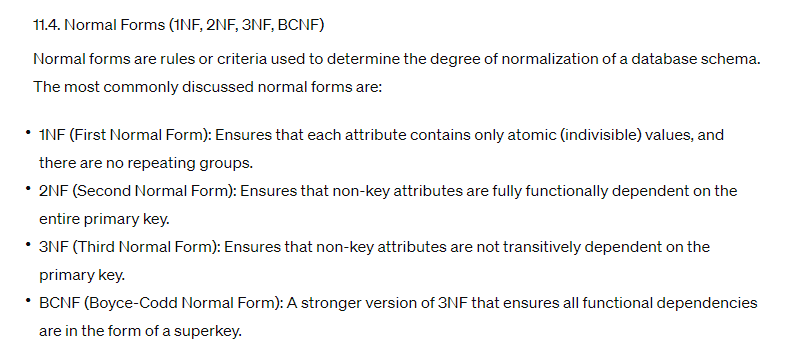

#First Normal Form (1NF)

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table that violates 1NF
cursor.execute('''CREATE TABLE Students (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Subjects TEXT
                )''')

# Insert data with repeating groups
cursor.execute("INSERT INTO Students (Name, Subjects) VALUES ('John', 'Math, Physics, Chemistry')")
cursor.execute("INSERT INTO Students (Name, Subjects) VALUES ('Jane', 'Biology, History')")

# Retrieve data
cursor.execute("SELECT * FROM Students")
result = cursor.fetchall()
print("Data in Students table (violating 1NF):", result)

# Close connection
conn.close()

Data in Students table (violating 1NF): [(1, 'John', 'Math, Physics, Chemistry'), (2, 'Jane', 'Biology, History')]


#Second Normal Form (2NF)

In [ ]:
# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table that violates 2NF
cursor.execute('''CREATE TABLE Orders (
                    OrderID INTEGER PRIMARY KEY,
                    ProductID INTEGER,
                    ProductName TEXT,
                    CustomerID INTEGER,
                    CustomerName TEXT
                )''')

# Insert data with partial dependency
cursor.execute("INSERT INTO Orders (ProductID, ProductName, CustomerID) VALUES (101, 'Laptop', 1)")
cursor.execute("INSERT INTO Orders (ProductID, ProductName, CustomerID) VALUES (102, 'Printer', 2)")

# Retrieve data
cursor.execute("SELECT * FROM Orders")
result = cursor.fetchall()
print("Data in Orders table (violating 2NF):", result)

# Close connection
conn.close()

Data in Orders table (violating 2NF): [(1, 101, 'Laptop', 1, None), (2, 102, 'Printer', 2, None)]


#Third Normal Form (3NF)

In [ ]:
# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table that violates 3NF
cursor.execute('''CREATE TABLE Employees (
                    EmployeeID INTEGER PRIMARY KEY,
                    EmployeeName TEXT,
                    DepartmentID INTEGER,
                    DepartmentName TEXT
                )''')

# Insert data with transitive dependency
cursor.execute("INSERT INTO Employees (EmployeeName, DepartmentID, DepartmentName) VALUES ('John', 1, 'IT')")
cursor.execute("INSERT INTO Employees (EmployeeName, DepartmentID, DepartmentName) VALUES ('Jane', 2, 'HR')")

# Retrieve data
cursor.execute("SELECT * FROM Employees")
result = cursor.fetchall()
print("Data in Employees table (violating 3NF):", result)

# Close connection
conn.close()

Data in Employees table (violating 3NF): [(1, 'John', 1, 'IT'), (2, 'Jane', 2, 'HR')]


#Boyce-Codd Normal Form (BCNF)

In [ ]:
# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table that violates BCNF
cursor.execute('''CREATE TABLE Employees (
                    EmployeeID INTEGER PRIMARY KEY,
                    EmployeeName TEXT,
                    DepartmentID INTEGER,
                    DepartmentName TEXT,
                    UNIQUE (DepartmentID, DepartmentName)
                )''')

# Insert data violating BCNF
cursor.execute("INSERT INTO Employees (EmployeeName, DepartmentID, DepartmentName) VALUES ('John', 1, 'IT')")
cursor.execute("INSERT INTO Employees (EmployeeName, DepartmentID, DepartmentName) VALUES ('Jane', 2, 'HR')")

# Retrieve data
cursor.execute("SELECT * FROM Employees")
result = cursor.fetchall()
print("Data in Employees table (violating BCNF):", result)

# Close connection
conn.close()

Data in Employees table (violating BCNF): [(1, 'John', 1, 'IT'), (2, 'Jane', 2, 'HR')]


#Normalization Algorithms
Normalization algorithms are procedures used to decompose a relation into multiple relations that satisfy the criteria of a specific normal form.

In [ ]:
# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create initial table
cursor.execute('''CREATE TABLE InitialTable (
                    ID INTEGER PRIMARY KEY,
                    Attribute1 TEXT,
                    Attribute2 TEXT,
                    Attribute3 TEXT
                )''')

# Insert data into the initial table
cursor.execute("INSERT INTO InitialTable (Attribute1, Attribute2, Attribute3) VALUES ('A1', 'B1', 'C1')")
cursor.execute("INSERT INTO InitialTable (Attribute1, Attribute2, Attribute3) VALUES ('A2', 'B2', 'C2')")

# Create decomposed tables
cursor.execute('''CREATE TABLE Table1 (
                    ID INTEGER PRIMARY KEY,
                    Attribute1 TEXT
                )''')

cursor.execute('''CREATE TABLE Table2 (
                    ID INTEGER PRIMARY KEY,
                    Attribute2 TEXT
                )''')

cursor.execute('''CREATE TABLE Table3 (
                    ID INTEGER PRIMARY KEY,
                    Attribute3 TEXT
                )''')

# Insert data into decomposed tables
cursor.execute("INSERT INTO Table1 (ID, Attribute1) SELECT ID, Attribute1 FROM InitialTable")
cursor.execute("INSERT INTO Table2 (ID, Attribute2) SELECT ID, Attribute2 FROM InitialTable")
cursor.execute("INSERT INTO Table3 (ID, Attribute3) SELECT ID, Attribute3 FROM InitialTable")

# Close connection
conn.close()

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables

# Authors table respects 1NF because each attribute is atomic
# and there are no repeating groups.
cursor.execute('''CREATE TABLE Authors (
                    AuthorID INTEGER PRIMARY KEY,
                    AuthorName TEXT
                )''')

# Books table respects 1NF because each attribute is atomic
# and there are no repeating groups. It also respects 2NF
# because the non-prime attribute (Title) is fully functionally
# dependent on the entire primary key (BookID).
cursor.execute('''CREATE TABLE Books (
                    BookID INTEGER PRIMARY KEY,
                    Title TEXT,
                    AuthorID INTEGER,
                    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
                )''')

# Customers table respects 1NF because each attribute is atomic
# and there are no repeating groups.
cursor.execute('''CREATE TABLE Customers (
                    CustomerID INTEGER PRIMARY KEY,
                    CustomerName TEXT
                )''')

# Orders table respects 1NF because each attribute is atomic
# and there are no repeating groups. It also respects 2NF and 3NF
# because non-prime attributes (BookID, Quantity) are fully
# functionally dependent on the entire primary key (OrderID).
# It also respects BCNF because every non-trivial functional
# dependency is a dependency on a superkey (OrderID).
cursor.execute('''CREATE TABLE Orders (
                    OrderID INTEGER PRIMARY KEY,
                    CustomerID INTEGER,
                    BookID INTEGER,
                    Quantity INTEGER,
                    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
                    FOREIGN KEY (BookID) REFERENCES Books(BookID)
                )''')

# Populate tables with sample data

# Authors table
cursor.executemany("INSERT INTO Authors (AuthorName) VALUES (?)", [("Stephen King",), ("J.K. Rowling",)])

# Books table
cursor.executemany("INSERT INTO Books (Title, AuthorID) VALUES (?, ?)", [("IT", 1), ("Harry Potter", 2)])

# Customers table
cursor.executemany("INSERT INTO Customers (CustomerName) VALUES (?)", [("John Doe",), ("Jane Doe",)])

# Orders table
cursor.executemany("INSERT INTO Orders (CustomerID, BookID, Quantity) VALUES (?, ?, ?)", [(1, 1, 2), (2, 2, 1)])


# Commit changes and close connection
conn.commit()


# Retrieve all books along with their authors
cursor.execute('''SELECT Books.Title, Authors.AuthorName
                  FROM Books
                  INNER JOIN Authors ON Books.AuthorID = Authors.AuthorID''')
books_with_authors = cursor.fetchall()
print("Books with Authors:")
for row in books_with_authors:
    print(row)

# Retrieve all orders along with the customer names and book titles
cursor.execute('''SELECT Orders.OrderID, Customers.CustomerName, Books.Title, Orders.Quantity
                  FROM Orders
                  INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID
                  INNER JOIN Books ON Orders.BookID = Books.BookID''')
orders_with_details = cursor.fetchall()
print("\nOrders with Customer Names and Book Titles:")
for row in orders_with_details:
    print(row)

# Close connection
conn.close()

Books with Authors:
('IT', 'Stephen King')
('Harry Potter', 'J.K. Rowling')

Orders with Customer Names and Book Titles:
(1, 'John Doe', 'IT', 2)
(2, 'Jane Doe', 'Harry Potter', 1)


#Processing and Query Optimization

#Maintaining a Data Buffer in Memory

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables and populate data (as needed)
cursor.execute('''CREATE TABLE Records (
                    ID INTEGER PRIMARY KEY,
                    Data TEXT
                )''')
cursor.executemany("INSERT INTO Records (Data) VALUES (?)", [("Data1",), ("Data2",), ("Data3",)])

# Retrieve data and maintain a buffer in memory
cursor.execute("SELECT * FROM Records")
buffer_data = cursor.fetchall()

# Process data in memory
for row in buffer_data:
    print(row)

# Close connection
conn.close()

(1, 'Data1')
(2, 'Data2')
(3, 'Data3')


#SQL Query Processing

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables and populate data (as needed)
cursor.execute('''CREATE TABLE Records (
                    ID INTEGER PRIMARY KEY,
                    Data TEXT
                )''')
cursor.executemany("INSERT INTO Records (Data) VALUES (?)", [("Data1",), ("Data2",), ("Data3",)])

# Execute SQL queries
cursor.execute("SELECT * FROM Records WHERE ID = 2")
result = cursor.fetchall()

# Process query results
print("Query Result:", result)

# Close connection
conn.close()

Query Result: [(2, 'Data2')]


#Syntactic Optimization

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables and populate data (as needed)
cursor.execute('''CREATE TABLE Records (
                    ID INTEGER PRIMARY KEY,
                    Data TEXT
                )''')
cursor.executemany("INSERT INTO Records (Data) VALUES (?)", [("Data1",), ("Data2",), ("Data3",)])

# Execute optimized SQL queries with limited columns
cursor.execute("SELECT Data FROM Records WHERE ID = 2")
result = cursor.fetchall()

# Process query results
print("Query Result:", result)

# Close connection
conn.close()


Query Result: [('Data2',)]


#Physical Optimization

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables and populate data (as needed)
cursor.execute('''CREATE TABLE Records (
                    ID INTEGER PRIMARY KEY,
                    Data TEXT
                )''')
cursor.executemany("INSERT INTO Records (Data) VALUES (?)", [("Data1",), ("Data2",), ("Data3",)])

# Implement physical optimization techniques (e.g., indexing)
cursor.execute("CREATE INDEX idx_data ON Records (Data)")

# Execute optimized SQL queries
cursor.execute("SELECT * FROM Records WHERE Data = 'Data2'")
result = cursor.fetchall()

# Process query results
print("Query Result:", result)

# Close connection
conn.close()

Query Result: [(2, 'Data2')]


#Indexing

In SQLite, an index is a separate structure that stores the values of one or more columns from a table in a sorted order, facilitating faster data retrieval.

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table with sample data
cursor.execute('''CREATE TABLE Employees (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Age INTEGER,
                    Department TEXT,
                    Salary REAL
                )''')
cursor.executemany("INSERT INTO Employees (Name, Age, Department, Salary) VALUES (?, ?, ?, ?)", [
    ("John", 30, "IT", 50000),
    ("Jane", 25, "HR", 45000),
    ("Doe", 35, "Finance", 60000),
    ("Alex", 40, "IT", 55000),
    ("Emily", 28, "Finance", 52000),
    ("Michael", 32, "HR", 48000),
    ("Sophia", 38, "IT", 58000),
    ("William", 27, "Finance", 49000),
    ("Olivia", 33, "HR", 52000),
    ("James", 45, "IT", 62000)
])

# Create multiple indexes
cursor.execute("CREATE INDEX idx_age ON Employees (Age)")
cursor.execute("CREATE INDEX idx_department ON Employees (Department)")
cursor.execute("CREATE INDEX idx_salary ON Employees (Salary)")
cursor.execute("CREATE INDEX idx_age_salary ON Employees (Age, Salary)")
cursor.execute("CREATE INDEX idx_department_salary ON Employees (Department, Salary)")
cursor.execute("CREATE INDEX idx_age_department ON Employees (Age, Department)")
cursor.execute("CREATE INDEX idx_age_name ON Employees (Age, Name)")
cursor.execute("CREATE INDEX idx_name_department ON Employees (Name, Department)")
cursor.execute("CREATE INDEX idx_name_salary ON Employees (Name, Salary)")
cursor.execute("CREATE INDEX idx_age_department_salary ON Employees (Age, Department, Salary)")

# Execute a query using one of the indexes
cursor.execute("SELECT * FROM Employees WHERE Age = 30 AND Department = 'IT'")
result = cursor.fetchall()

# Print query result
print("Query Result with Index:", result)

# Close connection
conn.close()

Query Result with Index: [(1, 'John', 30, 'IT', 50000.0)]


#Transactions

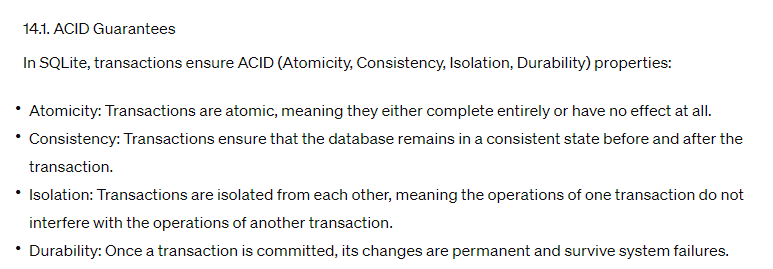

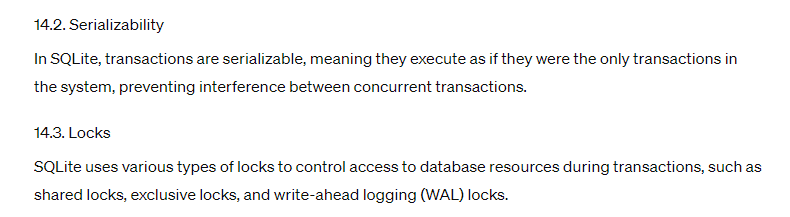

In [ ]:
import sqlite3

# Connect to SQLite in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table for bank accounts
cursor.execute('''CREATE TABLE Accounts (
                    ID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Balance REAL
                )''')

# Insert initial data for two accounts
cursor.executemany("INSERT INTO Accounts (Name, Balance) VALUES (?, ?)", [("John", 1000), ("Jane", 2000)])

try:
    # Perform 10 transactions
    for i in range(10):
        # Start a new transaction
        conn.execute("BEGIN TRANSACTION")

        try:
            # Transfer funds from John to Jane
            cursor.execute("UPDATE Accounts SET Balance = Balance - 100 WHERE Name = 'John'")
            cursor.execute("UPDATE Accounts SET Balance = Balance + 100 WHERE Name = 'Jane'")

            # Commit the transaction
            conn.commit()

        except Exception as e:
            # Rollback the transaction if an error occurs
            conn.rollback()
            print("Transaction failed:", e)

except Exception as e:
    print("Error:", e)

# Print balances after transactions
cursor.execute("SELECT * FROM Accounts")
print("Balances after Transactions:")
for row in cursor.fetchall():
    print(row)

# Close connection
conn.close()

Error: cannot start a transaction within a transaction
Balances after Transactions:
(1, 'John', 1000.0)
(2, 'Jane', 2000.0)


#Non-Relational Databases

#Graph Databases
Graph databases store data in a graph structure with nodes, edges, and properties. They are suitable for representing highly interconnected data, such as social networks, recommendation systems, and network topologies.

#Introduction to the Semantic Web
The Semantic Web is an extension of the World Wide Web that enables machines to understand the meaning (semantics) of data and information. It promotes common data formats, standardized metadata, and ontologies to enable automated reasoning and decision-making by computers.

In [ ]:
from neo4j import GraphDatabase
from rdflib import Graph, Literal, URIRef
from rdflib.namespace import FOAF, RDF, XSD

# Connect to a Neo4j graph database (assuming Neo4j is installed locally)
neo4j_uri = "bolt://localhost:7687"
neo4j_user = "neo4j"
neo4j_password = "password"
neo4j_driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

# Create a sample graph in Neo4j
def create_graph(tx):
    tx.run("CREATE (alice:Person {name: 'Alice'})-[:FRIENDS_WITH]->(bob:Person {name: 'Bob'})")

with neo4j_driver.session() as session:
    session.write_transaction(create_graph)

# Query the graph in Neo4j
def query_graph(tx):
    result = tx.run("MATCH (n:Person) RETURN n.name AS name")
    return [record["name"] for record in result]

with neo4j_driver.session() as session:
    names = session.read_transaction(query_graph)
    print("Nodes in Neo4j Graph:", names)

# Create a sample RDF graph with RDFLib
rdf_graph = Graph()
rdf_graph.add((URIRef("http://example.org/alice"), FOAF.name, Literal("Alice")))
rdf_graph.add((URIRef("http://example.org/alice"), FOAF.knows, URIRef("http://example.org/bob")))
rdf_graph.add((URIRef("http://example.org/bob"), FOAF.name, Literal("Bob")))

# Serialize and print RDF graph
print("\nRDF Graph Triples:")
for s, p, o in rdf_graph:
    print(s, p, o)

# Close Neo4j driver
neo4j_driver.close()